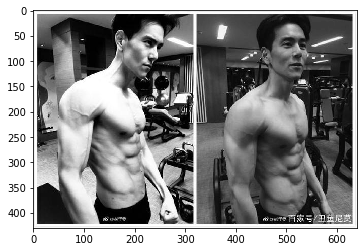

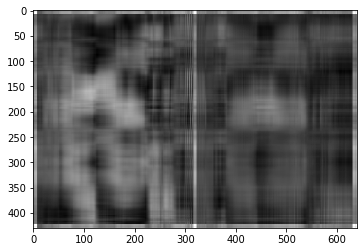

[[-190.92169341 -177.15850979 -174.2010857  ... -160.83837213
  -186.54158326 -192.94037722]
 [-177.81886772 -166.68663655 -166.79327567 ... -149.0270842
  -170.63155254 -175.83436204]
 [-172.48472882 -162.34105593 -162.63921431 ... -148.90385313
  -169.37840595 -172.42051545]
 ...
 [-172.57461513 -166.49084243 -167.66956753 ... -151.95757987
  -172.43407715 -171.56303305]
 [-176.54992641 -169.31723584 -169.44829001 ... -153.59565917
  -174.34426125 -176.55438425]
 [-189.4482587  -177.80855294 -175.83209351 ... -161.58702884
  -186.08873673 -191.47785557]]


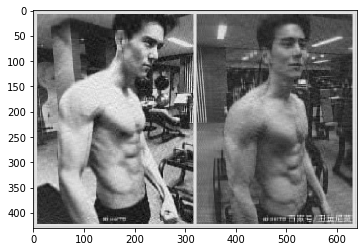

[[ 0.16799689  6.69711847  7.65083591 ...  8.03752914  3.76780944
  -2.14291504]
 [ 4.37200326  8.46916568  6.46922568 ... 11.87029902 10.77827415
   5.8970312 ]
 [ 6.52857379  9.93815973  7.78431629 ...  9.3239127   8.8678467
   6.33989392]
 ...
 [ 7.24080144  6.41626831  3.3759817  ...  6.83800911  6.60269095
   7.82856051]
 [ 6.94962457  7.13027622  5.10726984 ...  8.46821986  8.36626272
   6.52949918]
 [ 0.66044368  5.02249153  5.04352659 ...  6.36529813  3.21299191
  -1.76874479]]


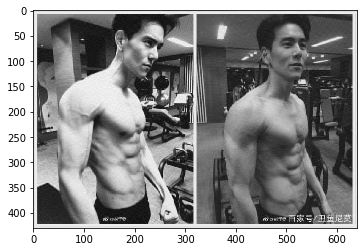

[[ 0.06721852  6.71378242  7.58205199 ...  7.87379606  3.69363998
  -2.30061131]
 [ 4.48820872  8.5668668   6.59187035 ... 11.87415073 10.87500829
   6.00268867]
 [ 6.25447174  9.86008092  7.57801126 ...  9.11036445  8.69437961
   6.03454541]
 ...
 [ 7.10996514  6.36430227  3.26569102 ...  6.65579779  6.48469328
   7.64511576]
 [ 6.83034797  7.10340053  5.02062895 ...  8.30911937  8.26642513
   6.39059348]
 [ 0.57294371  5.030499    4.98383738 ...  6.24347991  3.15582125
  -1.85308383]]


In [179]:
#### Action 1 ####

import numpy as np
from scipy.linalg import svd
from PIL import Image
import matplotlib.pyplot as plt

# 取前k个特征，对图像进行还原
def get_image_feature(s, k):
  # 对于S，只保留前K个特征值
  s_temp = np.zeros(s.shape[0])
  s_temp[0:k] = s[0:k]
  s = s_temp * np.identity(s.shape[0])
  # 用新的s_temp，以及p,q重构A
  temp = np.dot(p,s)
  temp = np.dot(temp,q)
  plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
  plt.show()
  print(A-temp)

# 加载256色图片
image = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/pic.jpeg') 
# Turn image to gray
image = image.convert('L')
A = np.array(image)

# 显示原图像
plt.imshow(A, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

# 对图像矩阵A进行奇异值分解，得到p,s,q
p,s,q = svd(A, full_matrices=False)

# 取前k个特征，对图像进行还原
get_image_feature(s, 5)
get_image_feature(s, 50)
get_image_feature(s, 100)



In [198]:
#### Action 2 ####

#!pip install scikit-surprise
from surprise import Dataset
from surprise.model_selection import cross_validate,train_test_split
from surprise import Reader
from surprise import BaselineOnly, KNNBasic, KNNBaseline, SlopeOne, SVD, SVDpp, KNNWithMeans, NMF
from surprise import accuracy
from surprise.model_selection import KFold
import pandas as pd
import time


def fit_and_predict(algo):
  t1 = time.time()
  print("目前模型 %s" % str(algo))

  ## 训练模型
  algo.fit(trainset)
  predictions = algo.test(testset)
  accuracy.rmse(predictions)

  # # # 对指定用户和商品进行评分预测
  uid = str(196) 
  iid = str(302) 
  pred = algo.predict(uid, iid, r_ui=4, verbose=True)
  print('共花费时间 %s' % str(time.time() - t1))
  print('########光荣的分割线#######')
  print('/n')


rattings_file = '/content/drive/My Drive/Colab Notebooks/datasets/ratings_small.txt'

# Load the movielens-100k dataset (download it if needed),
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)
data = Dataset.load_from_file(rattings_file, reader=reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD(biased=False)
fit_and_predict(algo)

algo = SVD(biased=True)
fit_and_predict(algo)

algo = SVDpp()
fit_and_predict(algo)


目前模型 <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fd976c02c88>
RMSE: 1.0307
user: 196        item: 302        r_ui = 4.00   est = 3.75   {'was_impossible': False}
共花费时间 4.782474517822266
########光荣的分割线#######
目前模型 <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7fd9741c0be0>
RMSE: 0.9027
user: 196        item: 302        r_ui = 4.00   est = 3.94   {'was_impossible': False}
共花费时间 4.988673448562622
########光荣的分割线#######
目前模型 <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7fd979f6b4a8>
RMSE: 0.8945
user: 196        item: 302        r_ui = 4.00   est = 3.88   {'was_impossible': False}
共花费时间 373.8936605453491
########光荣的分割线#######


In [115]:
#### Action 3 ####

##Step1. Fetch Data##
import requests
import json
import pandas as pd

def get_html_text(url):
    try:
        res = requests.get(url,timeout = 30)
        res.raise_for_status()
        res.encoding = res.apparent_encoding
        return res.text
    except:
        return "Error"

def parse_data():
    result = []
    country_len = len(areaTree_json)
    for i in range(0, country_len):
        #如果为中国则说明具有省份信息
        if(areaTree_json[i]["name"]=="中国"):
            #获取省份长度
            province_len = len(areaTree_json[i]["children"])  
            for j in range(0,province_len):
                #获取地区长度
                area_len=len(areaTree_json[i]["children"][j]["children"])
                for n in range(0,area_len):
                    #获取地区的总体疫情情况
                    total=areaTree_json[i]["children"][j]["children"][n]["total"]
                    country = '中国'
                    province = areaTree_json[i]["children"][j]["name"]
                    area = areaTree_json[i]["children"][j]["children"][n]["name"]
                    confirm = total["confirm"]
                    dead = total["dead"]
                    heal = total["heal"]
                    suspect = total["suspect"]
                    temp = {'city':area, 'province':province, 'country':country, \
                        'confirm':confirm,'heal':heal,'dead':dead, 'suspect':suspect, 'update_time':update_time} 
                    result.append(temp)
    return result


page_url = "https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5"

#获取Json
text = get_html_text(page_url)

#将json数据中的data字段的数据提取处理
json_text = json.loads(text)["data"]
# print(json.dumps(json_text,indent=2))
#将提取出的字符串转换为json数据
json_text = json.loads(json_text)
#更新时间
update_time = json_text["lastUpdateTime"]

#每日汇总信息
chinaTotal_json = json_text["chinaTotal"]
confirmCount = str(chinaTotal_json["confirm"])
suspectCount = str(chinaTotal_json["suspect"])
deadCount = str(chinaTotal_json["dead"])
heal = str(chinaTotal_json["heal"])
chinaAdd = str(json_text["chinaAdd"]['confirm'])
importedCase = str(chinaTotal_json["importedCase"])

print("更新时间：" + update_time + "\n" + "确诊人数为：" + confirmCount + "人\n" + "死亡人数为：" + deadCount + "人\n" + \
    "疑似人数为：" + suspectCount + "人\n" + "治愈人数为：" + heal + "人\n" + "新增确诊人数为：" + chinaAdd + "人\n" + "输入人数为：" + importedCase + "人\n")

# #包含国家、省份、地区的所有信息，且国家为首索引
areaTree_json=json_text["areaTree"]
# #获取信息并获取长度
result = parse_data()
# # 写入CSV
data = pd.DataFrame(result)
data.to_csv('city.csv')



##Step2. Visualize Data##
#!pip install pyecharts
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.faker import Faker


data = pd.read_csv('/content/city.csv')
data = data.groupby('province')['confirm'].sum().reset_index() #保留Index

#适合Geo Chart的Array格式
geo_data = [list(z) for z in zip(data['province'],data['confirm'])]
#计算90 percentile用于图像刻度，红色为最严重的Top 10%
percentile = np.percentile(data['confirm'],q=90)

#画图
c = (
    Geo()
    .add_schema(maptype="china")
    .add("geo", geo_data)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(max_=percentile), title_opts=opts.TitleOpts(title="冠状病毒累计确诊地图")
    )
    .render("冠状病毒累计确诊地图.html")
)

#加载HTML
import IPython
IPython.display.HTML(filename='/content/冠状病毒累计确诊地图.html')


更新时间：2020-04-21 14:11:01
确诊人数为：84271人
死亡人数为：4642人
疑似人数为：37人
治愈人数为：77978人
新增确诊人数为：34人
输入人数为：1608人

